In [154]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None


df = pd.read_csv(r'C:\Users\George\Downloads\Unicorn_Companies.csv')
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Financial Stage,Investors Count,Deal Terms,Portfolio Exits
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,IPO,28,8,5
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,None,29,12,None
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,Asset,39,12,1
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,Acquired,56,13,1
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,Acquired,25,5,2


In [155]:

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1037 entries, 0 to 1036
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Company            1037 non-null   object
 1   Valuation ($B)     1037 non-null   object
 2   Date Joined        1037 non-null   object
 3   Country            1037 non-null   object
 4   City               1037 non-null   object
 5   Industry           1037 non-null   object
 6   Select Inverstors  1037 non-null   object
 7   Founded Year       1037 non-null   object
 8   Total Raised       1037 non-null   object
 9   Financial Stage    1037 non-null   object
 10  Investors Count    1037 non-null   object
 11  Deal Terms         1037 non-null   object
 12  Portfolio Exits    1037 non-null   object
dtypes: object(13)
memory usage: 105.4+ KB


In [156]:
df.drop_duplicates(inplace=True)
for column in df:
    print((df[column] == 'None').sum()/len(df) ,column)
df=df.replace('None',0)

0.0 Company
0.0 Valuation ($B)
0.0 Date Joined
0.0 Country
0.0 City
0.0 Industry
0.01639344262295082 Select Inverstors
0.041465766634522665 Founded Year
0.023143683702989394 Total Raised
0.95274831243973 Financial Stage
0.0009643201542912247 Investors Count
0.027965284474445518 Deal Terms
0.95274831243973 Portfolio Exits


In [157]:
df = df.drop(['Financial Stage','Portfolio Exits'], axis=1)
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Investors Count,Deal Terms
0,Bytedance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,28,8
1,SpaceX,$100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,29,12
2,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,39,12
3,Klarna,$45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,56,13
4,Epic Games,$42,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,25,5


In [158]:
##1) Data Cleaning
##1.1)Valuation
df['Valuation ($B)'] = df['Valuation ($B)'].replace({"\$": ""}, regex=True)
df['Valuation ($B)'] = df['Valuation ($B)'].astype('float')
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Select Inverstors,Founded Year,Total Raised,Investors Count,Deal Terms
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",2012,$7.44B,28,8
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2002,$6.874B,29,12
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",2010,$2.901B,39,12
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2005,$3.472B,56,13
4,Epic Games,42.0,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures",1991,$4.377B,25,5


In [159]:
df['Valuation ($B)'] = df['Valuation ($B)'].astype('float')
##1.2)Industry
df['Industry'].value_counts()

Fintech                                                               205
Internet software & services                                          192
E-commerce & direct-to-consumer                                       107
Artificial intelligence                                                71
Health                                                                 69
Supply chain, logistics, & delivery                                    57
Other                                                                  56
Cybersecurity                                                          49
Data management & analytics                                            41
Mobile & telecommunications                                            37
Hardware                                                               33
Auto & transportation                                                  29
Edtech                                                                 28
Consumer & retail                     

In [160]:
df.loc[df['Industry']== 'Finttech' ,'Industry'] = 'Fintech'
df.loc[df['Industry']== 'Artificial Intelligence' ,'Industry'] = 'Artificial intelligence'
a=df['Industry'].value_counts()
a=a[a>1].index.tolist()
df['Industry'] = df['Industry'].apply(lambda x : 'Ventures' if x not in a else x)

In [161]:
##1.3)Investors Count
df['Investors Count'] = pd.to_numeric(df['Investors Count'],errors='coerce')

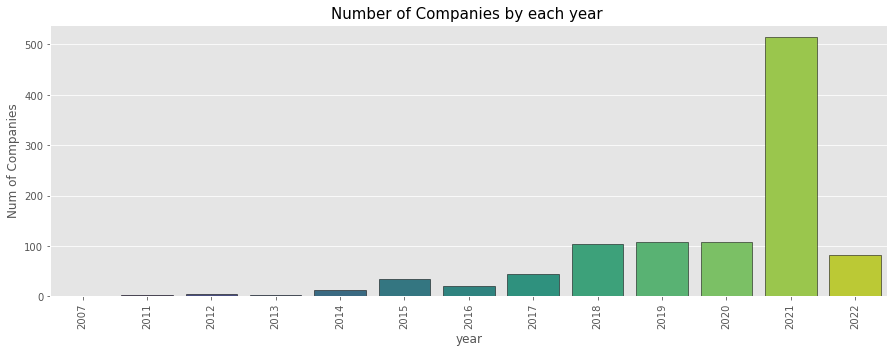

In [162]:
##1.4) Year Joined
year_data=df.copy()
year_data['year']=pd.to_datetime(year_data['Date Joined']).dt.year
year_data.dropna(subset=['year'],inplace=True)
fig,ax= plt.subplots(figsize=(15,5))
sns.barplot(x='year',y='Company',data=year_data.groupby('year',as_index=False)['Company'].count(),
           palette='viridis',edgecolor='black',ax=ax)
ax.tick_params(axis='x', labelrotation=90)
ax.set_ylabel('Num of Companies')
ax.set_title('Number of Companies by each year ', fontsize=15);

In [163]:
##1.4) Select Investors
df[['Investor 1', 'Investor 2', 'Investor 3', 'Investor 4']] =df['Select Inverstors'].str.split(', ', expand=True)
df.drop(columns='Select Inverstors', inplace=True)
frames = [df['Investor 1'],df['Investor 2'],df['Investor 3'],df['Investor 4']]
investors = pd.concat(frames)


In [164]:
##1.5) Total Raised
df['Total Raised'] = df['Total Raised'].replace({"\$": ""}, regex=True)
df['Total Raised'] = (df['Total Raised'].replace(r'[KMB]+$', '', regex=True).astype(float) * \
            df['Total Raised'].str.extract(r'[\d\.]+([KMB]+)', expand=False)
               .fillna(1)
               .replace(['K','M','B'], [10**(-6), 10**(-3),1]).astype(float))

In [165]:
##EDA
df['Year joined'] = pd.to_datetime(df['Date Joined']).dt.year
df['Year joined'] = pd.to_numeric(df['Year joined'])
df['Founded Year']=df['Founded Year'].replace('None',0)
df['Founded Year'] = pd.to_numeric(df['Founded Year'])
df['Years to join'] = df['Year joined']-df['Founded Year']

In [166]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1037 entries, 0 to 1036
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Company          1037 non-null   object 
 1   Valuation ($B)   1037 non-null   float64
 2   Date Joined      1037 non-null   object 
 3   Country          1037 non-null   object 
 4   City             1037 non-null   object 
 5   Industry         1037 non-null   object 
 6   Founded Year     1037 non-null   int64  
 7   Total Raised     1037 non-null   float64
 8   Investors Count  1037 non-null   int64  
 9   Deal Terms       1037 non-null   object 
 10  Investor 1       1020 non-null   object 
 11  Investor 2       974 non-null    object 
 12  Investor 3       885 non-null    object 
 13  Investor 4       6 non-null      object 
 14  Year joined      1037 non-null   int64  
 15  Years to join    1037 non-null   int64  
dtypes: float64(2), int64(4), object(10)
memory usage: 137.7+ KB


In [167]:

import pycountry_convert as pc
df['country_code'] = df['Country'].apply(pc.country_name_to_country_alpha2)
df['Continent'] = df.country_code.apply(pc.country_alpha2_to_continent_code)
df['Continent'].value_counts()

NA    563
AS    307
EU    136
SA     21
OC      6
AF      4
Name: Continent, dtype: int64

In [168]:
from opencage.geocoder import OpenCageGeocode

<AxesSubplot:xlabel='Type', ylabel='count'>

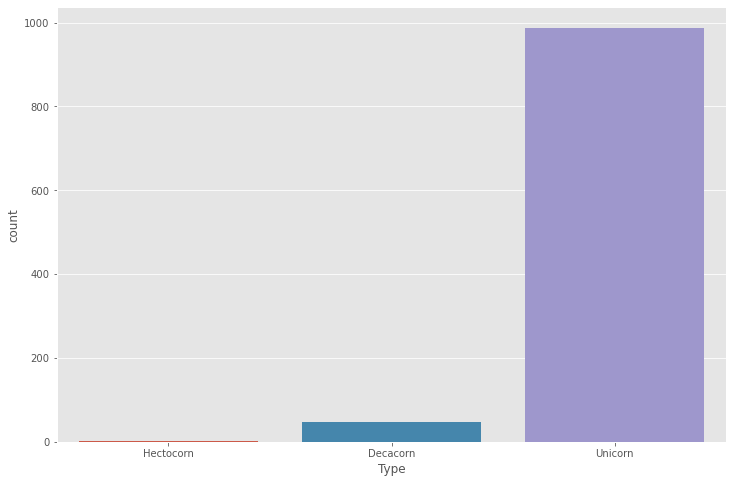

In [169]:
df['Type'] = df['Valuation ($B)'].apply(lambda x: 'Hectocorn' if x >=100 else ('Decacorn' if x >= 10 else 'Unicorn'))
sns.countplot(x="Type", data=df)

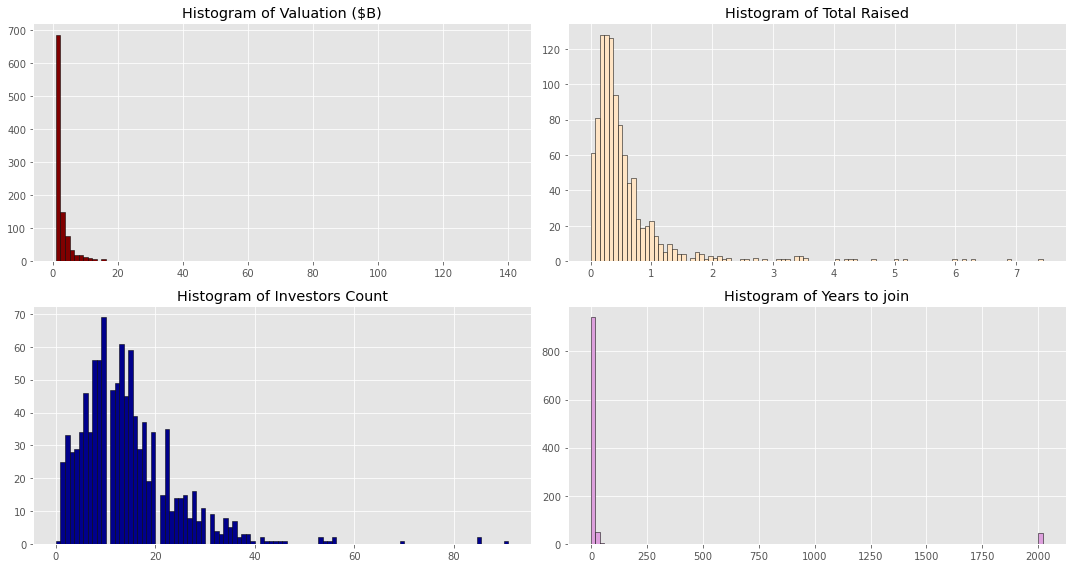

In [170]:
num_col = ['Valuation ($B)' ,'Total Raised' ,'Investors Count' , 'Years to join']
fig, ax= plt.subplots(nrows=2, ncols=2, figsize=(15,8))
ax_index=[ax[0,0],ax[0,1],ax[1,0],ax[1,1]]
color= ['maroon','bisque','darkblue','plum']
for i in range(4):
    ax_index[i].hist(df[num_col[i]],bins=100,color=color[i], edgecolor='black')
    ax_index[i].set_title(f'Histogram of {num_col[i]}')
fig.tight_layout();

In [171]:
import plotly.express as px
fig = px.treemap(df,path= ["Country","Industry", "Company"],
            values="Valuation ($B)", color_discrete_sequence=px.colors.qualitative.Pastel)

fig.update_traces(root_color="lightgrey")
fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))

In [172]:
fig = px.bar(data_frame=df, x="Type", y="Valuation ($B)", color="Continent", facet_col="Industry", facet_col_wrap=4,
color_discrete_sequence=px.colors.qualitative.Pastel)
fig.update_yaxes(matches=None)
fig.for_each_yaxis(lambda y: y.update(title = ''))
fig.add_annotation(x=-3,y=0.5,
                   text="Valuation (in $B)", textangle=-92,
                    xref="paper", yref="paper")
fig.show()

In [173]:
inv = investors.value_counts().rename_axis('unique_values').reset_index(name='counts')
inv =inv[inv['counts']>10]
fig = px.pie(inv, values='counts', names='unique_values')
fig.show()

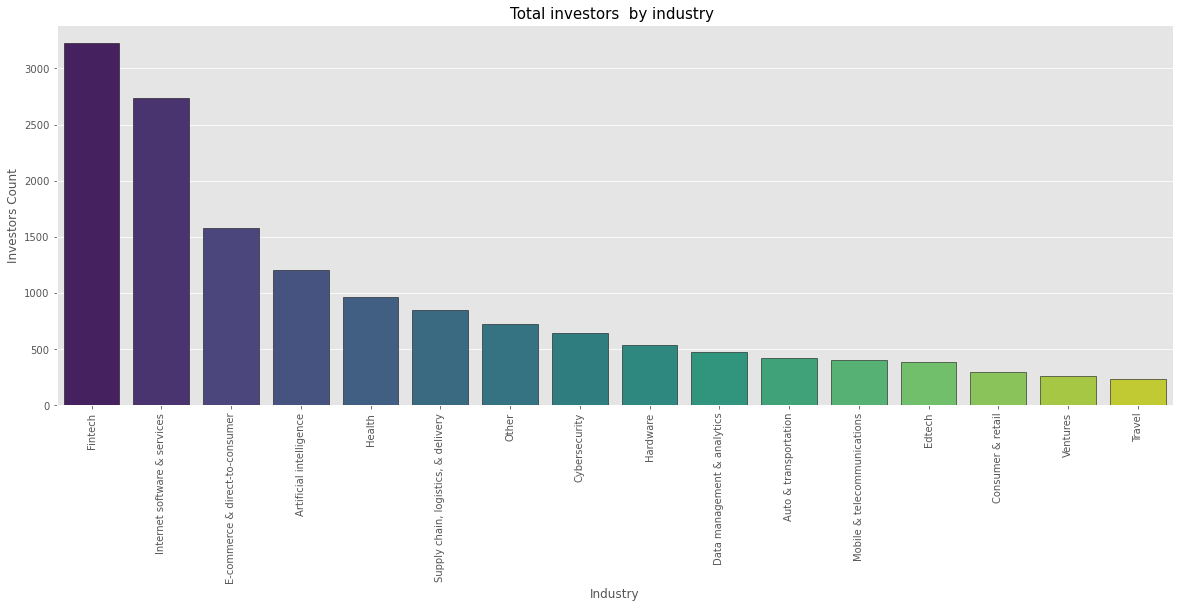

In [174]:
fig,ax=plt.subplots(figsize=(20,7))
sns.barplot(x='Industry',y='Investors Count', palette='viridis', edgecolor='black',
            data= df.groupby('Industry',as_index=False)['Investors Count'].sum().sort_values('Investors Count',ascending=False))
ax.tick_params(axis='x', labelrotation=90)
ax.set_title('Total investors  by industry ', fontsize=15);

<AxesSubplot:>

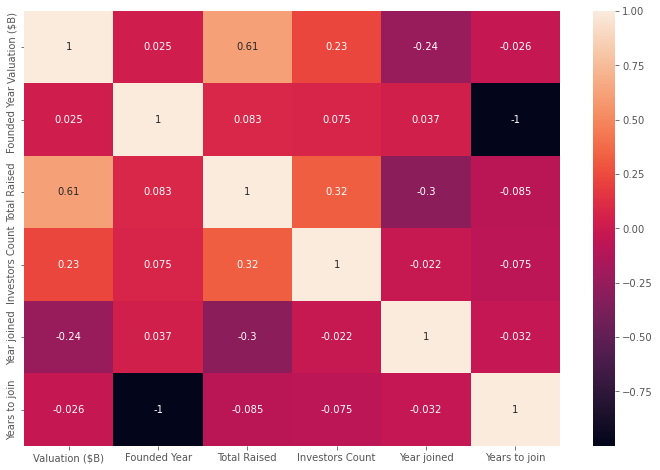

In [175]:
corr = df.corr()

sns.heatmap(df.corr(),annot=True)


In [176]:
df1 = df.copy()
df1.apply(lambda x: x.factorize()[0]).corr(method='pearson')

,Company,Valuation ($B),Date Joined,Country,City,Industry,Founded Year,Total Raised,Investors Count,Deal Terms,Investor 1,Investor 2,Investor 3,Investor 4,Year joined,Years to join,country_code,Continent,Type
Company,1.000000,0.944034,0.670590,0.094892,0.251482,-0.006662,0.127154,0.924280,0.125652,0.236685,0.544340,0.524253,0.524165,-0.018838,0.034138,0.048763,0.094892,-0.029367,0.360959
Valuation ($B),0.944034,1.000000,0.701202,0.094288,0.267169,0.005362,0.139007,0.878774,0.157644,0.260573,0.543946,0.515177,0.499347,-0.020841,0.044520,0.055963,0.094288,-0.036085,0.517775
Date Joined,0.670590,0.701202,1.000000,0.080819,0.174463,0.048215,0.086747,0.634560,0.147339,0.167766,0.369951,0.399429,0.298908,-0.037431,0.002853,0.078345,0.080819,-0.031667,0.347441
Country,0.094892,0.094288,0.080819,1.000000,0.403389,-0.024997,0.040326,0.084470,0.064815,0.024530,0.124254,-0.020818,-0.020275,0.015740,0.031265,0.076203,1.000000,0.341231,0.085089
City,0.251482,0.267169,0.174463,0.403389,1.000000,-0.007207,0.093137,0.203685,0.101543,0.118215,0.220075,0.111255,0.065392,0.009929,0.048407,0.096434,0.403389,0.150163,0.162219
Industry,-0.006662,0.005362,0.048215,-0.024997,-0.007207,1.000000,0.024898,-0.025540,0.024661,0.031829,0.023439,0.011137,-0.000283,0.005617,-0.016550,0.003947,-0.024997,-0.134401,0.045138
Founded Year,0.127154,0.139007,0.086747,0.040326,0.093137,0.024898,1.000000,0.102225,0.109385,0.186732,0.075426,0.015044,0.015001,-0.015651,0.016004,0.334135,0.040326,0.019210,0.117072
Total Raised,0.924280,0.878774,0.634560,0.084470,0.203685,-0.025540,0.102225,1.000000,0.063468,0.179747,0.493825,0.493019,0.480997,-0.021420,0.023759,0.027818,0.084470,-0.021031,0.343980
Investors Count,0.125652,0.157644,0.147339,0.064815,0.101543,0.024661,0.109385,0.063468,1.000000,0.193401,0.104915,0.066654,0.006724,0.020675,0.021303,0.111507,0.064815,0.050281,0.170694
Deal Terms,0.236685,0.260573,0.167766,0.024530,0.118215,0.031829,0.186732,0.179747,0.193401,1.000000,0.160849,0.179784,0.108391,-0.049044,0.002057,0.047879,0.024530,-0.048346,0.160406


<AxesSubplot:>

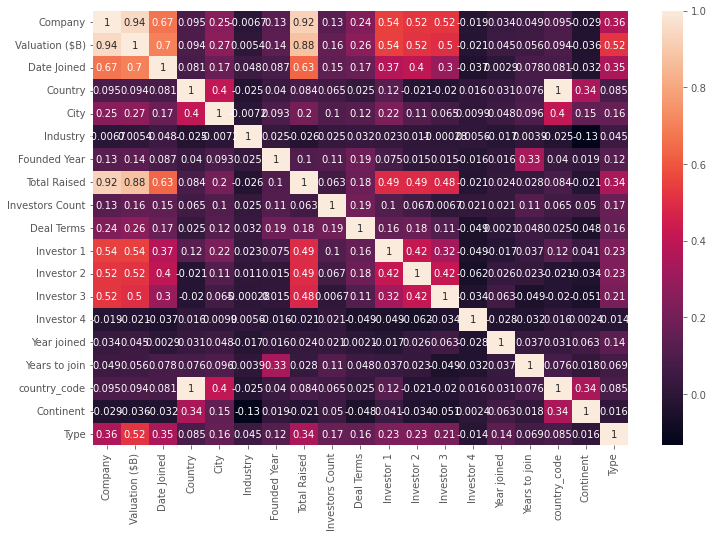

In [177]:
sns.heatmap(df1.apply(lambda x: x.factorize()[0]).corr(method='pearson'),annot=True)

In [178]:
!pip install descartes

In [179]:
df.head()

,Company,Valuation ($B),Date Joined,Country,City,Industry,Founded Year,Total Raised,Investors Count,Deal Terms,Investor 1,Investor 2,Investor 3,Investor 4,Year joined,Years to join,country_code,Continent,Type
0,Bytedance,140.0,4/7/2017,China,Beijing,Artificial intelligence,2012,7.440,28,8,Sequoia Capital China,SIG Asia Investments,Sina Weibo,Softbank Group,2017,5,CN,AS,Hectocorn
1,SpaceX,100.3,12/1/2012,United States,Hawthorne,Other,2002,6.874,29,12,Founders Fund,Draper Fisher Jurvetson,Rothenberg Ventures,None,2012,10,US,NA,Hectocorn
2,Stripe,95.0,1/23/2014,United States,San Francisco,Fintech,2010,2.901,39,12,Khosla Ventures,LowercaseCapital,capitalG,None,2014,4,US,NA,Decacorn
3,Klarna,45.6,12/12/2011,Sweden,Stockholm,Fintech,2005,3.472,56,13,Institutional Venture Partners,Sequoia Capital,General Atlantic,None,2011,6,SE,EU,Decacorn
4,Epic Games,42.0,10/26/2018,United States,Cary,Other,1991,4.377,25,5,Tencent Holdings,KKR,Smash Ventures,None,2018,27,US,NA,Decacorn


In [180]:
fig = px.bar(df, x="Investors Count", y="Deal Terms", color="Industry", barmode="relative", facet_col="Type")
fig.show()